# CDF and PDF of Normal Distribution

In [ ]:
# On giving Z-score it will return cdf
import scipy.stats as stats
stats.norm.cdf(1.2)

In [ ]:
# On giving cdf it return z value
stats.norm.ppf(0.88493033)

Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

In [ ]:
from sklearn.datasets import load_iris
digit = load_iris()
df = pd.DataFrame(digit.data,columns = digit.feature_names)
df.head()
df["target"] = digit.target
df["flower"] = np.where(df.target==0,digit.target_names[0],np.where(df.target==1,digit.target_names[1],digit.target_names[2]))
df.drop("target",axis=1,inplace = True)
df.head()

Ploting Pdf and Cdf of a feature with different label categories(Inbuilt method)

In [ ]:
# plotting pdf to see how the distribution of fa
sns.FacetGrid(df,hue = "flower",size= 5).map(sns.distplot, "petal width (cm)")

plotting cdf & pdf of a feature with different categories(from Scratch)

In [ ]:
def pdf(series,bins):
    bin_edges = []
    start = np.min(series)
    bin_width = (np.max(series)-np.min(series))/bins
    while start<np.max(series):
        start+=bin_width
        bin_edges.append(start)
    density ={}
    for k in bin_edges:
        density[k]=[]
    for i in sorted(a):
        for j in bin_edges:
            if (i<j):
                density[j]+=[i]
                break
    prob_den = {}
    for p in density:
        prob_den[p]=len(density[p])
    return plt.bar(prob_den.keys(),prob_den.values())

In [ ]:
setosa = df.loc[df["flower"]=="setosa"]
versicolor = df.loc[df["flower"]=="versicolor"]
virginica = df.loc[df["flower"]=="virginica"]

In [ ]:
counts, bin_edges = np.histogram(setosa["petal length (cm)"],bins =7,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
print(pdf)

counts, bin_edges = np.histogram(virginica["petal length (cm)"],bins =6)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
print(pdf)

counts, bin_edges = np.histogram(versicolor["petal length (cm)"],bins =6)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
print(pdf)

Statistical parameters

In [ ]:
np.mean(df["sepal length (cm)"])
np.std(df["sepal length (cm)"])

In [ ]:
np.median(df["sepal length (cm)"])

In [ ]:
np.percentile(df["sepal length (cm)"],np.arange(0,100,25))
np.percentile(df["sepal length (cm)"],90)

In [ ]:
from statsmodels import robust
robust.mad(df["sepal length (cm)"])

# Calculating skewness and kurtosis

Kurtosis and Skew function using Scipy library

In [ ]:
# Importing library
from scipy.stats import skew
# Calculate the skewness
print(skew(df["sepal length (cm)"], axis=0, bias=True))
# positive skew means distribution is unsymmetrical and skewed on right side.

In [ ]:
# Importing library
from scipy.stats import kurtosis
# Calculate the kurtosis(fisher= True means Excess kurtosis)
print(kurtosis(df["sepal length (cm)"], axis=0, fisher=True, bias=True))
# Negative excess kurtosis means tailness is less than normal(max and min lies
# under mean +- 3sigma)

In [ ]:
df["sepal length (cm)"].describe()

Skew and Kurtosis from scratch

In [ ]:
def mean(data):
    counts = sum(data)
    n = len(data)
    avg = counts/n
    return avg
mean(df["sepal length (cm)"])

In [ ]:
def skew(data):
    m3 = sum([i**3 for i in (data-mean(data))])/len(data)
    s3 = sum([i**2 for i in (data-mean(data))])/(len(data)-1)
    b1 = m3/s3**1.5
    return b1
skew(df["sepal length (cm)"])

In [ ]:
def kurtosis(data,excess=False):
    m4 = sum([i**4 for i in (data-mean(data))])/len(data)
    m2 = sum([i**2 for i in (data-mean(data))])/len(data)
    g2 = m4/m2**2
    g3 = g2-3
    if excess ==False:
        return g2
    else:
        return g3
kurtosis(df["sepal length (cm)"],excess=True)

# Standardizing data

In [ ]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
# standardization 
scale = object.fit_transform(digit.data)  # input should be 2D array
print(scale)

Standardization from Scratch

In [ ]:
def mean(data):
    avg = sum(data)/len(data)
    return avg
mean(digit.data)

In [ ]:
def varianc(data):
    deviation = (sum([i**2 for i in (data-mean(data))])/len(data))**.5
    return deviation
varianc(digit.data)

In [ ]:
def standardscaler(data):
    x_new = (data-mean(data))/varianc(data)
    return x_new
standardscaler(digit.data)

# KDE(Kernel Density Estimation)

In [ ]:
import seaborn as sns
sns.histplot(df["petal length (cm)"],kde = True)

# QQ plot code

In [ ]:
import numpy as np 
import pylab 
import scipy.stats as stats
import matplotlib.pyplot as plt

Using Probplot to find type of distribution

In [ ]:
# Generating a dataset follows normal distribution
# QQ plot is a scatter plot between all percentile values between two distribution.
measurements = np.random.normal(loc = 0, scale = 1, size=10000)
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

In [ ]:
#when datapoints are very less
measurements = np.random.normal(loc = 0, scale = 1, size=50)
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

In [ ]:
distribution=np.random.uniform(1,10,size=1000)
stats.probplot(distribution, dist="norm",plot=pylab)
pylab.show()

In [ ]:
distribution=np.random.uniform(1,10,size=50)
stats.probplot(distribution, dist="norm",plot=pylab)
pylab.show()

Finding QQ plot via scatter plot between the percentile value of differnent disrtibution.

In [ ]:
dist1 = np.random.normal(loc=0,scale=1,size=1000)
dist2 = np.random.normal(loc=10,scale=25,size=500)

In [ ]:
def QQplot(dist1,dist2):
    x1 = []
    x2 = []
    for i in range(0,101):
        x1.append(np.percentile(dist1,i))
        x2.append(np.percentile(dist2,i))
    return plt.scatter(x1,x2)
QQplot(dist1,dist2)

In [ ]:
QQplot(df["petal length (cm)"],df["petal width (cm)"])

# CLT code

In [ ]:
# CLT is done to to predict mean and standard deviation of population with 
# more confidence
import numpy as np
import random
population = [random.randint (0, 1000) for x in range (1000)] #list of numbers

In [ ]:
# random.sample apply on list not on array
sample1= random.sample(population,50)
print(sample1)

In [ ]:
mean=np.mean(population)
print(mean)

In [ ]:
std=np.std(population)
print(std)

In [ ]:
# mean of a sample from population
mean1=np.mean(sample1)
mean1

In [ ]:
# standard deviation of a sample from population
std1=np.std(sample1)
std1

In [ ]:
# here sampling distrinution of sample mean will follow gaussian distribution
# and it has mean = population mean and std = (population std/n**1/2) 
# where n is size of a sample.
def sampling_distribution(distribution,sample_count,sample_size):
    sampling_dist=[]
    for i in range(sample_count):
        sample1 = random.sample(distribution,sample_size)
        sampling_dist.append(np.mean(sample1))
    mean_sample_dist = np.mean(sampling_dist)
    std_sample_dist = np.std(sampling_dist)
    return mean_sample_dist, std_sample_dist

In [ ]:
# here if we multiply std with n**1/2, we will get population std
sampling_distribution(population,500,49)

# Randomly sample data point(Uniform)

Using inbuilt function

In [ ]:
import numpy as np
import random
df = np.random.uniform(0,100,150)             # Return array
s1 = np.array(random.sample(list(df),30))     # np.array convert to array,
s1                                            # random.sample take list,dict

Uniformly Sample data from Scratch

In [ ]:
import numpy as np
import random
sampled=[]
def uniform_sample(data,m):
    p=m/len(data)
    for i in range(0,len(data)):
        a=np.random.random()
        if a<=p:
            sampled.append(data[i])
    x=len(sampled)
    return sampled,x
df1 =np.random.uniform(0,100,150)
uniform_sample(df1,30)
#as the size of data increases with sample, x tends to actual proportion i.e p

# How to check if given distribution is log normal

In [ ]:
import numpy
import random
import scipy.stats as stats
import pylab
dist_1 = np.random.lognormal(0,1,1000)
distlog = np.log(dist_1)
stats.probplot(distlog,dist="norm",plot=pylab)
pylab.show()

Converting normal distribution to lognormal

In [ ]:
# Generating normal distribution
norm_dist= np.random.normal(loc=0,scale=1,size=100)
# Converting normal to lognormal
lognorm_dist= np.exp(norm_dist)

properties of lognormal distribution

In [ ]:
# 68-95-99.7 rule can be applied to exp(X), where X is lognormal
# 0 is mean and 1 is std of corresponding normal distribution.
d = pd.DataFrame(np.random.lognormal(0,1,1000))
d.columns = ["num"]
a = d.loc[d["num"]>=np.exp(0-1)]
b = a.loc[a["num"]<=np.exp(0+1)]
b.shape

# log-log plot for pareto distribution

log log plot from scratch

In [ ]:
# Generating pareto distribution alpha=2 and x_m=3
pareto_1 = (np.random.pareto(.1,10000)+1)*2
pareto_2 = (np.random.pareto(.15,10000)+1)*3
x = []
y = []
def loglog(dist1,dist2):
    for i in range(0,101):
        x.append(np.percentile(dist1,i))
        y.append(np.percentile(dist2,i))
    xlog = np.log(x)
    ylog = np.log(y)
    plt.scatter(xlog,ylog)
    return plt.show()
loglog(pareto_1,pareto_2)

# Box Cox Transformation

In [ ]:
# Generating a distribution
pareto_dist=(np.random.pareto(1,1000)+1)*3
stats.probplot(pareto_dist,dist='norm',plot=pylab)
pylab.show()

In [ ]:
# here boxcox funtion will return "labda" and normal distributed form of 
# given distribution.
modify_pareto,lamb=stats.boxcox(pareto_dist)
stats.probplot(modify_pareto,dist='uniform',plot=pylab)
pylab.show()
print("lambda",lamb)

# Covariance

Finding Covariance using np.cov()

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
cov_mat = np.cov(df.T)
sns.heatmap(cov_mat,annot = True)

Calculating covariance from scratch

In [ ]:
def covariance(dataset):
    n=dataset.shape[1]
    m=dataset.shape[0]
    covar=[]
    for i in range(0,n):
        for j in range(0,n):
            c = dataset.iloc[:,i]-np.mean(dataset.iloc[:,i])
            d = dataset.iloc[:,j]-np.mean(dataset.iloc[:,j])
            covar.append(sum(c*d)/m)
    return np.array(covar).reshape(n,n)
covariance(digit)

# Pearson Correlation

Pearson Correlation Coefficient

In [ ]:
cor_mat = np.corrcoef(digit.T)
cor_mat.shape
print(cor_mat)
print(sns.heatmap(cor_mat,annot=True))

Pearson Correlation from Scratch

In [ ]:
def correlation(dataset):
    n = dataset.shape[1]
    c = []
    for i in range(0,n):
        for j in range(0,n):
            a = dataset.iloc[:,i]-np.mean(dataset.iloc[:,i])
            b = dataset.iloc[:,j]-np.mean(dataset.iloc[:,j])
            var_a = (sum([s**2 for s in a]))**.5
            var_b = (sum([s**2 for s in b]))**.5
            c.append(sum(a*b)/(var_a*var_b))
    return np.array(c).reshape(n,n)
correlation(digit)

# Spearman Rank Correlation Coeff.(SRCC)

In [ ]:
import scipy.stats as stats
a = stats.spearmanr(digit)
print(dir(a))
sns.heatmap(a.correlation,annot=True)      # correlation return srcc values here.

SRCC from Scratch

In [ ]:
digit["rank_sepal length (cm)"] = digit["sepal length (cm)"].rank(method="average")
digit["rank_sepal width (cm)"] = digit["sepal width (cm)"].rank(method="average")
digit["rank_petal length (cm)"] = digit["petal length (cm)"].rank(method="average")
digit["rank_petal width (cm)"] = digit["petal width (cm)"].rank(method="average")
digit.drop(["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"],axis=1,inplace = True)
def srcc(dataset):
    n = dataset.shape[1]
    c = []
    for i in range(0,n):
        for j in range(0,n):
            a = dataset.iloc[:,i]-np.mean(dataset.iloc[:,i])
            b = dataset.iloc[:,j]-np.mean(dataset.iloc[:,j])
            var_a = (sum([s**2 for s in a]))**.5
            var_b = (sum([s**2 for s in b]))**.5
            c.append(sum(a*b)/(var_a*var_b))
    return np.array(c).reshape(n,n)
print(srcc(digit))

# Bootstraping code sample

In [ ]:
def confidence_interval(dataset):
    n = len(dataset)
    m = []
    for i in range(1000):
        sample = np.random.choice(dataset,size=n)
        m.append(np.median(sample))
    median_dist = np.array(m)
    conf_inter = [np.percentile(median_dist,2.5),np.percentile(median_dist,97.5)]
    return conf_inter
x = np.array([180,162,158,172,168,150,171,183,165,176])
confidence_interval(x)

# KS test

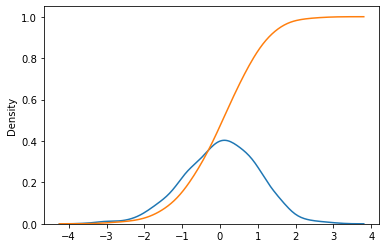

KstestResult(statistic=0.038572754731056924, pvalue=0.09938678808337997)

In [3]:
from scipy import stats
dist = np.random.normal(0,1,1000)
sns.kdeplot(dist)
sns.kdeplot(dist,cumulative=True)
plt.show();
stats.kstest(dist,"norm")
# statistic is maximum difference in distance between distributions
# if pvalue is large accept the null hypothesis i.e distribution are same

# Proportional Sampling

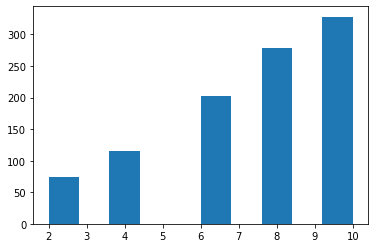

In [27]:
def proportional_sampling(data):
    n = len(data)
    prop_list = []
    data.sort()
    norm_list = np.cumsum(data/sum(data))
    for i in range(1000):
        a = np.random.random()
        for j in range(n):
            if a<norm_list[j]:
                prop_list.append(data[j])
                break
    return plt.hist(prop_list)
arr = np.array([2,4,6,8,10])
proportional_sampling(arr);